<a href="https://colab.research.google.com/github/md-Junaid/2021-04_Trajectory_Data_CS_CAU_MScProject/blob/main/Flood_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1F_iDkFM-AgOyg0czl1ACDVNnTDSH7gB_

Downloading...
From: https://drive.google.com/uc?id=1F_iDkFM-AgOyg0czl1ACDVNnTDSH7gB_
To: /content/training.zip
100% 150M/150M [00:01<00:00, 80.5MB/s]


In [ ]:
!gdown 182sru8Exs_ZDJyzWvuw1Lr95U5D_zgpr

Downloading...
From: https://drive.google.com/uc?id=182sru8Exs_ZDJyzWvuw1Lr95U5D_zgpr
To: /content/validation.zip
100% 57.3M/57.3M [00:00<00:00, 76.4MB/s]


After downloading the datasets, unzip the files

In [ ]:
import zipfile

# Unzip training set
local_zip = './training.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./training')

# Unzip validation set
local_zip = './validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation')

zip_ref.close()

In [ ]:
import os

# Directory with training Flooding pictures
train_flood_dir = os.path.join('./training/Flooded')

# Directory with training Non Flooding pictures
train_non_flood_dir = os.path.join('./training/Not Flooded')

# Directory with validation Flooding pictures
validation_flood_dir = os.path.join('./validation/Flooded')

# Directory with validation Non Flooding pictures
validation_non_flood_dir = os.path.join('./validation/Not Flooded')

In [ ]:
# import shutil

# shutil.rmtree('/content/training')
# shutil.rmtree('/content/validation')

In [ ]:
train_flood_file_names = os.listdir(train_flood_dir)
print(f'Training set flood file names: {train_flood_file_names[:10]}')

train_non_flood_file_names = os.listdir(train_non_flood_dir)
print(f'Training set non flood file names: {train_non_flood_file_names[:10]}')

validation_flood_file_names = os.listdir(validation_flood_dir)
print(f'Validation set flood file names: {validation_flood_file_names[:10]}')

Training set flood file names: ['sub-buzz-592-1626451614-8.jpg', 'gettyimages-536612588.jpg', '967.jpg', 'claire-sparkles-mh-3.jpg', '32969aff816ec8de14009808f8bd3bee.jpg', 'thumbs_b_c_b921c94381ef36f14e1c03a43297e4e3.jpg', 'image_25.jpg', 'image_89.jpg', '5baaa62d3cf8c-74cf5d17-bc59-416b-8689-13bd8e8cbd08-DMID1-5g928ydin-640x360.jpg', 'aptopix-italy-venice-flooding.jpg']
Training set non flood file names: ['street-photography-exercises-16.jpg', '9e23dde3_c89b_4324_aee5_50e0fe119d78_43ad8b19-fc74-45c5-95dc-d7542a6a74e5.jpg', 'images (1).png', 'dxeru8jy46so5glda6haz8gm8govoltu.jpeg', 'stock-photo-south-korea-december-urban-and-suburban-roads-of-south-korea-792925507.jpg', 'nt1dbmo1zy1bitszk41xyh9qvewqgtcp.jpeg', '799-491.jpg', '350px-The_RealR747extension.JPG', 'istockphoto-468793563-1024x1024.jpg', '227fb31c108b067f66bc36b5e41e2df0.jpg']
Validation set flood file names: ['11755628_041622-ktrk-flood-tax-day.jpg', 'eba3a2d4bac6dd41e695bd89fe891311.jpg', 'istockphoto-1329068252-170667a.jp

In [ ]:
print(f'total training flooding images: {len(os.listdir(train_flood_dir))}')
print(f'total training non-flooding images: {len(os.listdir(train_non_flood_dir))}')
print(f'total validation flooding images: {len(os.listdir(validation_flood_dir))}')
print(f'total validation non-flooding images: {len(os.listdir(validation_non_flood_dir))}')

total training flooding images: 490
total training non-flooding images: 445
total validation flooding images: 250
total validation non-flooding images: 190


Displaying a batch of 8 flooding and 8 non flooding pictures randomly

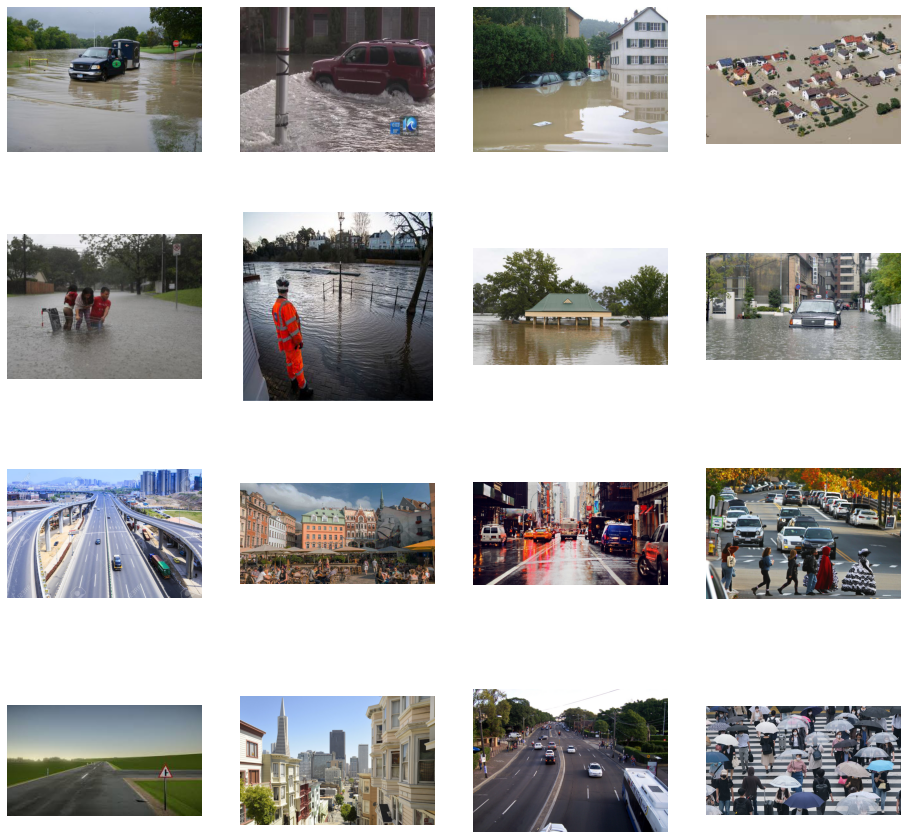

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Outputing images in 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_flooded_pic = [os.path.join(train_flood_dir, fname)
                  for fname in train_flood_file_names[pic_index-8:pic_index]]

next_non_flooded_pic = [os.path.join(train_non_flood_dir, fname)
                  for fname in train_non_flood_file_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_flooded_pic+next_non_flooded_pic):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Using data generator for preprocessing the images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

training_generator = training_datagen.flow_from_directory(
    './training/',
    target_size=(300, 300),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    './validation/',
    target_size=(300, 300),
    batch_size=20,
    class_mode='binary'
)

Found 930 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
# from tensorflow.keras.layers import LeakyReLU

print(tf.__version__)

2.8.2


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check accuracy
    if(logs.get('accuracy') > 0.97):

      # Stop if threshold is met
      print("\nAccuracy is graeter than 97%, so cancelling the training!!!")
      self.model.stop_training = True

    elif(logs.get('val_accuracy') > 0.97):
      print("\nValidation accuracy is greater than 97%, so cancelling the training!!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
      # Note the input shape is the desired size of the image 300x300 with 3 bytes color
      # This is the first convolution
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The second convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The third convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # tf.keras.layers.Dropout(0.2),
      # The fourth convolution
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.25),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      # tf.keras.layers.Dense(128, activation='relu'),
      # tf.keras.layers.Dropout(0.2),
      # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Flooded') and 1 for the other ('Not Flooded')
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0003, decay=1e-6),
              metrics=['accuracy'])
  return model
# model.compile(loss='binary_crossentropy',
#               optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam'),
#               metrics=['accuracy'])


In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
history = model.fit(
      training_generator,
      # steps_per_epoch=45,
      epochs=30,
      verbose=2,
      validation_data = validation_generator,
      # validation_steps=22,
      callbacks=[callbacks]
      )

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


47/47 - 130s - loss: 0.6218 - accuracy: 0.6441 - val_loss: 0.5770 - val_accuracy: 0.7205 - 130s/epoch - 3s/step
Epoch 2/30
47/47 - 126s - loss: 0.5300 - accuracy: 0.7290 - val_loss: 0.5292 - val_accuracy: 0.7545 - 126s/epoch - 3s/step
Epoch 3/30
47/47 - 126s - loss: 0.4519 - accuracy: 0.8000 - val_loss: 0.6845 - val_accuracy: 0.6909 - 126s/epoch - 3s/step
Epoch 4/30
47/47 - 126s - loss: 0.4358 - accuracy: 0.8000 - val_loss: 0.5594 - val_accuracy: 0.7500 - 126s/epoch - 3s/step
Epoch 5/30
47/47 - 128s - loss: 0.4115 - accuracy: 0.8323 - val_loss: 0.5857 - val_accuracy: 0.7386 - 128s/epoch - 3s/step
Epoch 6/30
47/47 - 127s - loss: 0.3635 - accuracy: 0.8527 - val_loss: 0.5817 - val_accuracy: 0.7659 - 127s/epoch - 3s/step
Epoch 7/30
47/47 - 126s - loss: 0.3278 - accuracy: 0.8677 - val_loss: 0.5132 - val_accuracy: 0.7659 - 126s/epoch - 3s/step
Epoch 8/30
47/47 - 126s - loss: 0.3067 - accuracy: 0.8710 - val_loss: 0.6323 - val_accuracy: 0.7568 - 126s/epoch - 3s/step
Epoch 9/30
47/47 - 126s - l

In [ ]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.figure()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

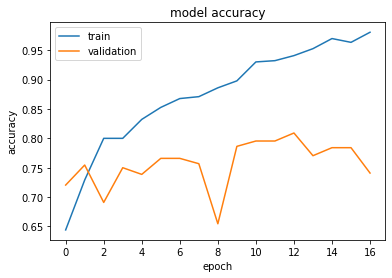

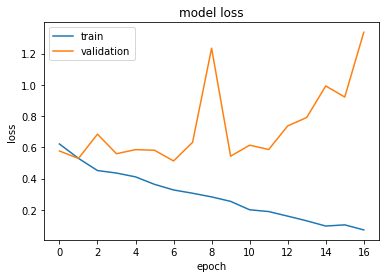

In [ ]:
plot_loss_acc(history)

In [ ]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(300, 300))
#   x = image.img_to_array(img)
#   x /= 255
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(classes[0])
#   if classes[0]>0.5:
#     print(fn + " is not flooded")
#   else:
#     print(fn + " is flooded")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


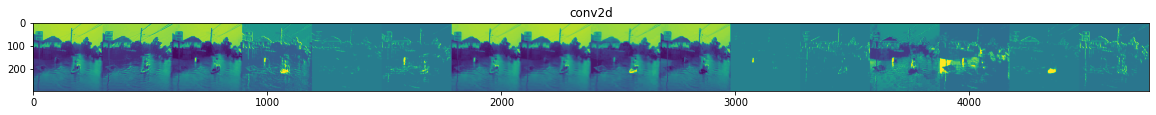

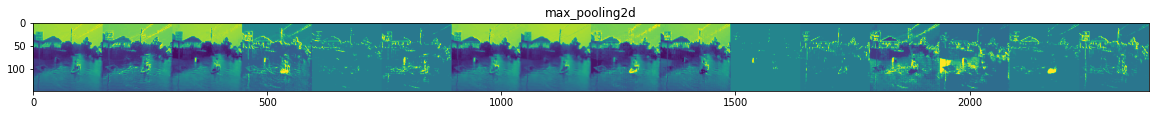

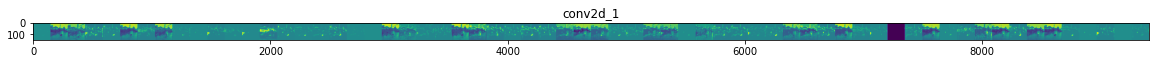

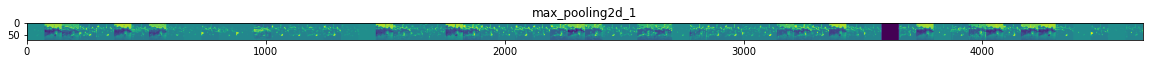

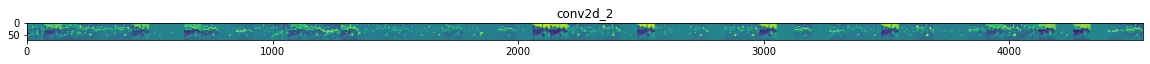

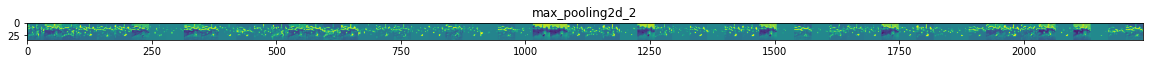

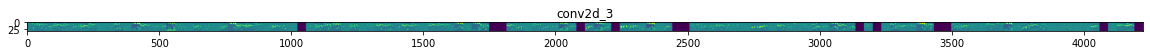

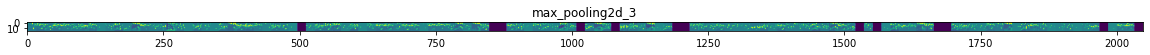

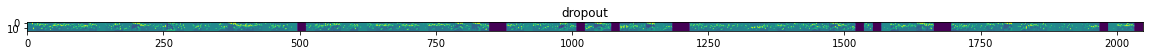

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
flood_img_files = [os.path.join(train_flood_dir, f) for f in train_flood_file_names]
non_flood_img_files = [os.path.join(train_non_flood_dir, f) for f in train_non_flood_file_names]
img_path = random.choice(flood_img_files + non_flood_img_files)
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (300, 300, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [ ]:
augmented_model = create_model()

augmented_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 64)      9280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 64)      

In [ ]:
training_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(
    rescale=1./255.
    # rotation_range=100,
    # width_shift_range=0.3,
    # height_shift_range=0.3,
    # shear_range=0.3,
    # zoom_range=0.3,
    # horizontal_flip=True,
    # fill_mode='nearest'
)

training_generator = training_datagen.flow_from_directory(
    './training/',
    target_size=(300, 300),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    './validation/',
    target_size=(300, 300),
    batch_size=20,
    class_mode='binary'
)


Found 930 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


In [ ]:
history_with_aug = augmented_model.fit(
    training_generator,
    # steps_per_epoch=45,  # 930 images = batch_size * steps
    epochs=25,
    validation_data=validation_generator,
    # validation_steps=22,  # 440 images = batch_size * steps
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


47/47 - 143s - loss: 0.7119 - accuracy: 0.5258 - val_loss: 0.7141 - val_accuracy: 0.4341 - 143s/epoch - 3s/step
Epoch 2/25
47/47 - 142s - loss: 0.5954 - accuracy: 0.6860 - val_loss: 0.7006 - val_accuracy: 0.6545 - 142s/epoch - 3s/step
Epoch 3/25
47/47 - 142s - loss: 0.5401 - accuracy: 0.7516 - val_loss: 0.8418 - val_accuracy: 0.6227 - 142s/epoch - 3s/step
Epoch 4/25
47/47 - 141s - loss: 0.5102 - accuracy: 0.7559 - val_loss: 0.6603 - val_accuracy: 0.6932 - 141s/epoch - 3s/step
Epoch 5/25
47/47 - 140s - loss: 0.5221 - accuracy: 0.7591 - val_loss: 0.8440 - val_accuracy: 0.6205 - 140s/epoch - 3s/step
Epoch 6/25
47/47 - 143s - loss: 0.4914 - accuracy: 0.7753 - val_loss: 0.5588 - val_accuracy: 0.7227 - 143s/epoch - 3s/step
Epoch 7/25
47/47 - 142s - loss: 0.5059 - accuracy: 0.7720 - val_loss: 0.8140 - val_accuracy: 0.6068 - 142s/epoch - 3s/step
Epoch 8/25
47/47 - 143s - loss: 0.4852 - accuracy: 0.7968 - val_loss: 1.3792 - val_accuracy: 0.5091 - 143s/epoch - 3s/step
Epoch 9/25
47/47 - 142s - l

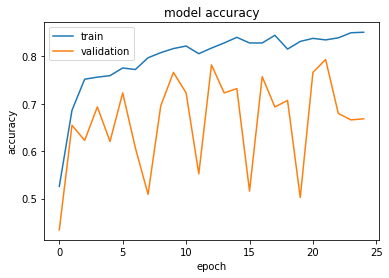

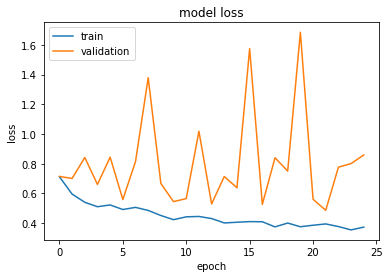

In [ ]:
plot_loss_acc(history_with_aug)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-07-20 10:10:01--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   159MB/s    in 0.5s    

2022-07-20 10:10:02 (159 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

# pre_trained_model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('mixed8')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 1280)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.45)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

# Append the dense network to the base model
final_model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
final_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_8[0][0]']               
 alization)                     )                                                           

In [ ]:
final_model.compile(optimizer = RMSprop(learning_rate=0.00012), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
final_model_history = final_model.fit(
    training_generator,
    # steps_per_epoch=45,  # 930 images = batch_size * steps
    epochs=15,
    validation_data=validation_generator,
    # validation_steps=22,  # 440 images = batch_size * steps
    verbose=2,
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


47/47 - 289s - loss: 2.0049 - accuracy: 0.6742 - val_loss: 0.6575 - val_accuracy: 0.7545 - 289s/epoch - 6s/step
Epoch 2/15
47/47 - 288s - loss: 0.5615 - accuracy: 0.8108 - val_loss: 0.1982 - val_accuracy: 0.9182 - 288s/epoch - 6s/step
Epoch 3/15
47/47 - 286s - loss: 0.3854 - accuracy: 0.8495 - val_loss: 0.1570 - val_accuracy: 0.9386 - 286s/epoch - 6s/step
Epoch 4/15
47/47 - 285s - loss: 0.3287 - accuracy: 0.8871 - val_loss: 0.0964 - val_accuracy: 0.9591 - 285s/epoch - 6s/step
Epoch 5/15
47/47 - 282s - loss: 0.3716 - accuracy: 0.8688 - val_loss: 0.1141 - val_accuracy: 0.9523 - 282s/epoch - 6s/step
Epoch 6/15
47/47 - 281s - loss: 0.3811 - accuracy: 0.8828 - val_loss: 0.1269 - val_accuracy: 0.9477 - 281s/epoch - 6s/step
Epoch 7/15
47/47 - 282s - loss: 0.2900 - accuracy: 0.8957 - val_loss: 0.0754 - val_accuracy: 0.9727 - 282s/epoch - 6s/step
Epoch 8/15
47/47 - 283s - loss: 0.2122 - accuracy: 0.9269 - val_loss: 0.2822 - val_accuracy: 0.9091 - 283s/epoch - 6s/step
Epoch 9/15
47/47 - 280s - l

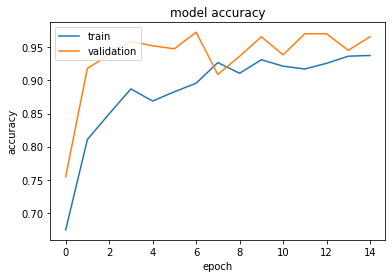

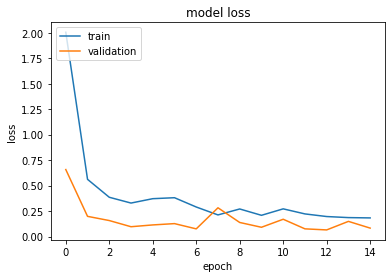

In [ ]:
plot_loss_acc(final_model_history)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  basic_model_classes = model.predict(images, batch_size=10)
  augmented_model_classes = augmented_model.predict(images, batch_size=10)
  final_model_classes = final_model.predict(images, batch_size=10)
  print(basic_model_classes[0])
  if basic_model_classes[0]>0.5:
    print(fn + " is not flooded - basic model")
  else:
    print(fn + " is flooded - basic model")
  print(augmented_model_classes[0])
  if augmented_model_classes[0]>0.5:
    print(fn + " is not flooded - augmentation model")
  else:
    print(fn + " is flooded - augmentation model")
  print(final_model_classes[0])
  if final_model_classes[0]>0.5:
    print(fn + " is not flooded - final model")
  else:
    print(fn + " is flooded - final model")
  print("===========================================================")

Saving Flooded-1.jpg to Flooded-1.jpg
Saving Flooded-2.jpg to Flooded-2.jpg
Saving Flooded-3.jpg to Flooded-3.jpg
Saving Flooded-4.jpg to Flooded-4.jpg
Saving Flooded-5.jpg to Flooded-5.jpg
Saving Flooded-6.jpg to Flooded-6.jpg
Saving Flooded-7.jpg to Flooded-7.jpg
Saving Flooded-8.jpg to Flooded-8.jpg
Saving Flooded-9.jpg to Flooded-9.jpg
Saving Flooded-10.jpg to Flooded-10.jpg
Saving Flooded-11.jpg to Flooded-11.jpg
Saving Flooded-12.jpg to Flooded-12.jpg
Saving Not-Flooded-1.jpg to Not-Flooded-1.jpg
Saving Not-Flooded-2.jpg to Not-Flooded-2.jpg
Saving Not-Flooded-3.jpg to Not-Flooded-3.jpg
Saving Not-Flooded-4.jpeg to Not-Flooded-4.jpeg
Saving Not-Flooded-5.jpeg to Not-Flooded-5.jpeg
Saving Not-Flooded-6.jpg to Not-Flooded-6.jpg
Saving Not-Flooded-7.jpeg to Not-Flooded-7.jpeg
Saving Not-Flooded-8.jpeg to Not-Flooded-8.jpeg
Saving Not-Flooded-9.jpg to Not-Flooded-9.jpg
Saving Not-Flooded-10.jpeg to Not-Flooded-10.jpeg
[0.03332034]
Flooded-1.jpg is flooded - basic model
[0.10219601]
F

In [ ]:
!pip install gradio -q

     |████████████████████████████████| 5.6 MB 24.9 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 140 kB 52.6 MB/s 
     |████████████████████████████████| 1.1 MB 47.1 MB/s 
     |████████████████████████████████| 57 kB 5.5 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 212 kB 61.2 MB/s 
     |████████████████████████████████| 272 kB 56.9 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 2.3 MB 39.5 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
     |████████████████████████████████| 144 kB 52.4 MB/s 
     |████████████████████████████████| 271 kB 51.4 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 9.9 MB/s 
     |████████████████████████████████| 68 kB 5.7 MB/s 
     |██████████████████████████

In [ ]:
import gradio as gr
import numpy as np
from PIL import Image
import requests

labels = ["Flooded", "Not Flooded"]

In [ ]:
def classify_image_with_inception_model(im):
    # Resize the image to
    im = Image.fromarray(im.astype('uint8'), 'RGB')
    im = im.resize((300, 300))
    arr = np.array(im).reshape((-1, 300, 300, 3))
    arr = tf.keras.applications.inception_v3.preprocess_input(arr)
    prediction = final_model.predict(arr).flatten()
    print("This is the value: ", prediction)
    if prediction[0] > 0.5:
      return 'It is not flooded'
    else:
      return 'It is Flooded'
    # return {labels[i]: float(prediction[i]) for i in range(2)}

In [ ]:
imagein = gr.inputs.Image(shape=(300,300))
label = gr.outputs.Label(num_top_classes=2)
sample_images = [
                 ["Flooded-1.jpg"],
                 ["Flooded-2.jpg"],
                 ["Flooded-3.jpg"],
                 ["Flooded-4.jpg"],
                 ["Flooded-5.jpg"],
                 ["Not-Flooded-1.jpg"],
                 ["Not-Flooded-2.jpg"],
                 ["Not-Flooded-3.jpg"],
                 ["Not-Flooded-4.jpeg"],
                 ["Not-Flooded-5.jpeg"]
]

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

In [ ]:
from tensorflow.python.platform.tf_logging import debug
gr.Interface(classify_image_with_inception_model,
                      imagein, 
                      label,
                      title="InceptionNet",
                      description="This is just description!", 
                      examples=sample_images).launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://38192.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
